# Solving Lotka-Volterra ODEs

In [1]:
using Gadfly
using DataFrames
using DifferentialEquations

In [2]:
a = parse(Int64, readline());
b = parse(Int64, readline());
c = parse(Int64, readline());
d = parse(Int64, readline());
start_u = parse(Int64, readline());
end_u = parse(Int64, readline());

STDIN> 1
STDIN> 1
STDIN> 1
STDIN> 1
STDIN> 3
STDIN> 5


## Modeling equations and solving with RK4 method

Given problem can be represented by this system of equations:  

$ \begin{cases} \frac{dx}{dt} = Ax-Bxy \\ \frac{dy}{dt} = -Cy+Dxy \end{cases}$

In [3]:
function LVE(du,u,p,t)
 du[1] = a*u[1]-b*u[2]*u[1]
 du[2] = -c*u[2] + d*u[1]*u[2]
end

LVE (generic function with 1 method)

### Solving ODEs with RK4 method

In [4]:
u0 = [5.0;3.0]
tspan = (0.0,40.0)
problem = ODEProblem(LVE,u0,tspan)
sol = solve(problem, RK4())

retcode: Success
Interpolation: 3rd order Hermite
t: 238-element Array{Float64,1}:
  0.0      
  0.0346057
  0.0607757
  0.103669 
  0.156669 
  0.203738 
  0.255649 
  0.307923 
  0.364158 
  0.424874 
  0.495771 
  0.562331 
  0.630172 
  ⋮        
 38.7806   
 38.9476   
 39.0958   
 39.2304   
 39.3519   
 39.4629   
 39.5647   
 39.659    
 39.748    
 39.8343   
 39.9227   
 40.0      
u: 238-element Array{Array{Float64,1},1}:
 [5.0, 3.0]          
 [4.63175, 3.42392]  
 [4.32854, 3.75054]  
 [3.80327, 4.27803]  
 [3.14524, 4.87717]  
 [2.59218, 5.32461]  
 [2.04969, 5.7005]   
 [1.59194, 5.94802]  
 [1.20012, 6.07909]  
 [0.880827, 6.091]   
 [0.616013, 5.97972] 
 [0.444836, 5.79369] 
 [0.323891, 5.55528] 
 ⋮                   
 [2.55416, 0.0260118]
 [3.00326, 0.0349749]
 [3.46191, 0.0486585]
 [3.92969, 0.0699006]
 [4.39188, 0.102586] 
 [4.83941, 0.1532]   
 [5.25571, 0.23125]  
 [5.6218, 0.351618]  
 [5.91069, 0.537721] 
 [6.08057, 0.82831]  
 [6.05594, 1.29875]  
 [5.78853, 1.

In [17]:
arr1 = []
arr2 = []
for i = 1:length(sol.u)
    push!(arr1,sol.u[i][1])
    push!(arr2,sol.u[i][2])
end

In [18]:
writedlm("file.csv", [["t"; sol.t] ["x"; arr1] ["y"; arr2] ["experiment"; fill("exp1", length(arr1))]],';')

In [19]:
df1=DataFrame(t=sol.t, u=arr1)
df2=DataFrame(t=sol.t, u=arr2)

,t,u
1,0.0,3.0
2,0.03460567923621631,3.423918792720264
3,0.060775679880838124,3.7505403131676767
4,0.10366883657612176,4.278029863082527
5,0.15666890313362464,4.877165520500431
6,0.20373785325111698,5.32461126188563
7,0.2556488110798236,5.700502907752767
8,0.30792255583656386,5.948018279103658
9,0.3641576185424292,6.079089204210598
10,0.42487354932822446,6.090996923149803


### Simple plotting 

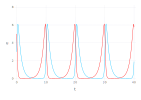

In [20]:
plot(layer(df1, x="t", y="u", Geom.line, Theme(default_color="red")),
     layer(df2, x="t", y="u", Geom.line))

## Series of experiments

Now we are going to use completed script from `LVSolver.jl` which is simply same as above code. 

In [2]:
run(`julia LVSolver.jl 1 1 1 1 3 5 out1.csv`)

Output written to:out1.csv


In [3]:
run(`julia LVSolver.jl 1 2 3 4 3 5 out2.csv`)

Output written to:out2.csv


In [4]:
run(`julia LVSolver.jl 3 1 3 1 3 5 out3.csv`)

Output written to:out3.csv


In [29]:
run(`julia LVSolver.jl 1 4 8 1 3 5 out4.csv`)

Output written to:out4.csv


### Reading csv files into one DataFrame

In [30]:
df1 = readtable("out1.csv", separator=';');
df2 = readtable("out2.csv", separator=';');
df3 = readtable("out3.csv", separator=';');
df4 = readtable("out4.csv", separator=';');

full_df = [df1; df2; df3; df4];

### Analysing data

In [76]:
single_exp = full_df[(full_df[:x].>5) & (full_df[:experiment].=="exp1"), :]


print("Showing mean, max and min value:\n")
print(mean(single_exp[:x]), "\n")
print(maximum(single_exp[:x]), "\n")
print(minimum(single_exp[:x]), "\n")


full_df[:Difference] = full_df[:x] .- full_df[:y]

full_df

Showing mean, max and min value:
25.71570154802906
40.57369716716592
5.000439897681223


Stacktrace:
 [1] depwarn(::String, ::Symbol) at ./deprecated.jl:70
 [2] &(::DataArrays.DataArray{Bool,1}, ::DataArrays.DataArray{Bool,1}) at ./deprecated.jl:57
 [3] include_string(::String, ::String) at ./loading.jl:522
 [4] execute_request(::ZMQ.Socket, ::IJulia.Msg) at /home/mateusz/.julia/v0.6/IJulia/src/execute_request.jl:158
 [5] (::Compat.#inner#17{Array{Any,1},IJulia.#execute_request,Tuple{ZMQ.Socket,IJulia.Msg}})() at /home/mateusz/.julia/v0.6/Compat/src/Compat.jl:385
 [6] eventloop(::ZMQ.Socket) at /home/mateusz/.julia/v0.6/IJulia/src/eventloop.jl:8
 [7] (::IJulia.##14#17)() at ./task.jl:335
while loading In[76], in expression starting on line 1


,t,x,y,experiment,Difference
1,0.0,3.0,5.0,exp1,-2.0
2,0.03437010542705209,2.5999920844604953,5.318694099508249,exp1,-2.718702015047753
3,0.05919540894215747,2.3298236734353797,5.515477048134935,exp1,-3.1856533746995552
4,0.09629993783995372,1.9613112034139877,5.7541778432075645,exp1,-3.792866639793577
5,0.1334902226380723,1.6378585587902803,5.926997595707242,exp1,-4.2891390369169615
6,0.17801648177354856,1.3111621993767777,6.0521024853558,exp1,-4.740940285979022
7,0.2266993708501133,1.0237400890897375,6.099938498682014,exp1,-5.076198409592276
8,0.2841602856599874,0.7642438058323413,6.060615555884493,exp1,-5.2963717500521525
9,0.35002617529542335,0.5498779391981132,5.922736869409152,exp1,-5.372858930211039
10,0.41037379354838455,0.41074907423440943,5.73853471981897,exp1,-5.3277856455845605


## 3. Plotting

### Phase space plot

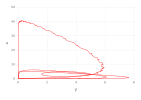

In [77]:
plot(layer(df1, x="y", y="x", Geom.polygon, Theme(default_color="red")),
  layer(df2, x="y", y="x", Geom.polygon, Theme(default_color="red")),
  layer(df3, x="y", y="x", Geom.polygon, Theme(default_color="red")),
  layer(df4, x="y", y="x", Geom.polygon, Theme(default_color="red")))

### Group plots - all experiments

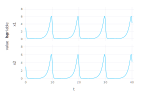

In [99]:
example = DataFrame(t=df1[:t], x1=df1[:x], x2=df1[:x])

xd = stack(example, [:x1, :x2])

plot(xd, ygroup="variable", x="t", y="value", Geom.subplot_grid(Geom.line))


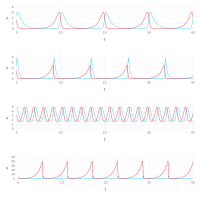

In [103]:
pl1 = plot(layer(df1, x="t", y="x", Geom.line, Theme(default_color="red")),
     layer(df1, x="t", y="y", Geom.line))
pl2 = plot(layer(df2, x="t", y="x", Geom.line, Theme(default_color="red")),
     layer(df2, x="t", y="y", Geom.line))
pl3 = plot(layer(df3, x="t", y="x", Geom.line, Theme(default_color="red")),
     layer(df3, x="t", y="y", Geom.line))
pl4 = plot(layer(df4, x="t", y="x", Geom.line, Theme(default_color="red")),
     layer(df4, x="t", y="y", Geom.line))
set_default_plot_size(20cm, 20cm)
vstack(pl1, pl2, pl3, pl4)